### A : - In this question, we work with a simplified version of Heart dataset. Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:


In [2]:
import pandas as pd


heart_df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")



### B :  Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [8]:
feature_heart_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

X_feat = heart_df[feature_heart_cols]  
print(X_feat.head())



y =heart_df['AHD']



from sklearn import preprocessing

# Normalize X
X = preprocessing.scale(X_feat)



   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4


### C : Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)



### D : Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

Accuracy (Logistic Regression): 0.7183098591549296
FPR: [0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
TPR: [0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]
AUC: 0.7650406504065042


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


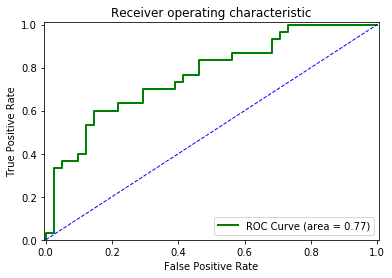

In [13]:
# Import LogisticRegression and accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate my_logreg object form LogisticRegression class
my_logreg = LogisticRegression()

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_logred = my_logreg.predict(X_test)

accuracy_logred = accuracy_score(y_test,y_predict_logred)
print('Accuracy of Logestic Regression :', accuracy_logred)

import matplotlib.pyplot as plt
from sklearn import metrics

Prediction = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Prediction[:,1], pos_label="Yes")
AUC = metrics.auc(fpr, tpr)
print('FPR:', fpr)
print('TPR:', tpr)
print('AUC:', AUC)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, and Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()